# Analysis on Rainfall in India from 1901 to 2017
## Using python to create an interactive dashboard and create insights on the rainfall data
>Data reference - https://data.gov.in/catalog/rainfall-india

## Data description
>The csv file contains-
<ul>
    <li>Name: Depicting the ROW no</li>
    <li>SUBDIVISION: Regions considered due to similar topological features</li>
            <ol>
                <li> Andaman and Nicobar Islands</li>
                <li> Arunachal Pradesh</li>
                <li> Assam and Meghalaya</li>
                <li> Nagaland, Manipur, Mizoram and Tripura</li>
                <li> Sub Himalayan West Bengal and Sikkim</li>
                <li> Gangetic West Bengal</li>
                <li> Orissa </li>
                <li> Jharkhand </li>
                <li> Bihar </li>
                <li> East Uttar Pradesh</li>
                <li> West Uttar Pradesh</li>
                <li> Uttarakhand </li>
                <li> Haryana Delhi and Chandigarh</li>
                <li> Punjab </li>
                <li> Himachal Pradesh</li>
                <li> Jammu and Kashmir</li>
                <li> West Rajasthan</li>
                <li> East Rajasthan</li>
                <li> West Madhya Pradesh</li>
                <li> East Madhya Pradesh</li>
                <li> Gujarat Region</li>
                <li> Saurashtra and Kutch</li>
                <li> Konkan and Goa</li>
                <li> Madhya Maharashtra</li>
                <li> Matathwada </li>
                <li> Vidarbha </li>
                <li> Chhattisgarh </li>
                <li> Coastal Andhra Pradesh </li>
                <li> Telangana</li>
                <li> Rayalseema</li>
                <li> Tamil Nadu</li>
                <li> Coastal Karnataka</li>
                <li> North Interior Karnataka</li>
                <li> South Interior Karnataka</li>
                <li> Kerala</li>
                <li> Lakshadweep</li>
           </ol>    
    <li>YEAR: Year in which rainfall occured </li>
    <li>The next 12 Columns are the different months</li>
    <li>The last 4 columns are the cumulative time period to show the seasons</li>
</ul>

### Steps followed 
<ul>
    <li>Data Collection.</li>
    <li>Clean Data.</li>
    <li>Using Statistics to get insights.</li>
    <li>Visualize</li>
</ul>

## Importing the libraries
### Plolty used for Graphical Tools
> Dash used to create the webapp

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import plotly
import plotly.express as px  # (version 4.7.0)
import plotly.graph_objects as go

import dash  # (version 1.12.0) pip install dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
sns.set()

### Reading the csv
>Using pandas read_csv method

In [3]:
data=pd.read_csv("Rainfall_Data.csv")
rain=data.copy()

In [4]:
data

Name                SUBDIVISION  YEAR   JAN    FEB   MAR    APR  \
0        ROW1  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3   
1        ROW2  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0   
2        ROW3  Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0   
3        ROW4  Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4   
4        ROW5  Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9   
...       ...                        ...   ...   ...    ...   ...    ...   
4182  ROW4183                Lakshadweep  2012  19.2    0.1   1.6   76.8   
4183  ROW4184                Lakshadweep  2013  26.2   34.4  37.5    5.3   
4184  ROW4185                Lakshadweep  2014  53.2   16.1   4.4   14.9   
4185  ROW4186                Lakshadweep  2015   2.2    0.5   3.7   87.1   
4186  ROW4187                Lakshadweep  2016  59.6   12.1   3.2    2.6   

        MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0     528.8  517.5  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3   
1     446.1  537.1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8   
2     235.1  479.9  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7   
3     304.5  495.1  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1   
4     279.5  628.7  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3   
...     ...    ...    ...    ...    ...    ...    ...    ...     ...      ...   
4182   21.2  327.0  231.5  381.2  179.8  145.9   12.4    8.8  1405.5     19.3   
4183   88.3  426.2  296.4  154.4  180.0   72.8   78.1   26.7  1426.3     60.6   
4184   57.4  244.1  116.1  466.1  132.2  169.2   59.0   62.3  1395.0     69.3   
4185  133.1  296.6  257.5  146.4  160.4  165.4  231.0  159.0  1642.9      2.7   
4186   77.4  321.1  262.6   86.2   75.6   58.6   32.0   74.7  1065.7     71.7   

      Mar-May  June-September  Oct-Dec  
0       560.3          1696.3    980.3  
1       458.3          2185.9    716.7  
2       236.1          1874.0    690.6  
3       506.9          1977.6    571.0  
4       309.7          1624.9    630.8  
...       ...             ...      ...  
4182     99.6          1119.5    167.1  
4183    131.1          1057.0    177.6  
4184     76.7           958.5    290.5  
4185    223.9           860.9    555.4  
4186     83.2           745.4    165.4  

[4187 rows x 20 columns]

>The code <code>rain.describe()</code> gives the count(No.of elements),mean(Average),std(Standard Deviation) and the    Quartiles(min,25%,50%,75%,max). <code>rain.describe().T</code> gives the transpose of the describe table using numpys T method

In [5]:
rain.describe().T

count         mean         std     min       25%      50%  \
YEAR            4187.0  1959.206831   33.709294  1901.0  1930.000  1959.00   
JAN             4183.0    18.937772   33.797148     0.0     0.600     5.90   
FEB             4184.0    21.604374   35.734572     0.0     0.500     6.50   
MAR             4181.0    27.395503   46.920068     0.0     1.000     7.90   
APR             4183.0    43.081712   68.156144     0.0     3.000    15.50   
MAY             4184.0    85.646511  122.706290     0.0     8.600    36.85   
JUN             4182.0   230.047704  234.276638     0.4    70.800   138.75   
JUL             4180.0   347.063780  268.867991     0.0   175.825   285.05   
AUG             4183.0   289.762156  188.444169     0.0   155.800   258.50   
SEP             4181.0   197.311863  135.563551     0.1   100.400   173.60   
OCT             4180.0    95.314713   99.204613     0.0    14.600    65.10   
NOV             4176.0    39.490685   68.365883     0.0     0.600     9.40   
DEC             4177.0    18.934858   43.003479     0.0     0.100     3.00   
ANNUAL          4161.0  1409.370031  902.693445    62.3   803.000  1120.20   
Jan-Feb         4181.0    40.527362   59.300319     0.0     4.000    18.90   
Mar-May         4178.0   155.798899  201.217676     0.0    24.000    74.75   
June-September  4177.0  1063.840938  706.750315    57.4   573.800   880.50   
Oct-Dec         4174.0   153.599018  166.852373     0.0    34.000    97.65   

                     75%     max  
YEAR            1988.000  2017.0  
JAN               22.000   583.7  
FEB               26.600   403.5  
MAR               31.300   605.6  
APR               49.700   595.1  
MAY               97.725  1168.6  
JUN              304.700  1609.9  
JUL              418.525  2362.8  
AUG              377.650  1664.6  
SEP              266.200  1222.0  
OCT              148.300   948.3  
NOV               45.300   648.9  
DEC               17.500   617.5  
ANNUAL          1642.900  6331.1  
Jan-Feb           50.200   699.5  
Mar-May          196.900  1745.8  
June-September  1287.500  4536.9  
Oct-Dec          211.725  1252.5

# Cleaning the Data
><code>data.isnull()</code> is used to get the null values present a column in a table, <code>data.isnull().sum()</code> gives the sum of how many null values are there in the tuple

In [58]:
data.isnull().sum()

Name               0
SUBDIVISION        0
YEAR               0
JAN                4
FEB                3
MAR                6
APR                4
MAY                3
JUN                5
JUL                7
AUG                4
SEP                6
OCT                7
NOV               11
DEC               10
ANNUAL            26
Jan-Feb            6
Mar-May            9
June-September    10
Oct-Dec           13
dtype: int64

## Replacing null values with the mean of the column containing the missing value
>The best method for this dataframe to get rid of null values is to replace the null value to the mean value for their respective tuple. This makes the distribution to concentrate to the mean value of the tuple.
<code>data.fillna(value)</code> 
used to fill the value for null values present in the tuple

In [60]:
for i in range(3,15):
    data.iloc[:,i]=data.iloc[:,i].fillna(data.iloc[:,i].mean())

In [79]:
data.isnull().sum()

Name               0
SUBDIVISION        0
YEAR               0
JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
NOV                0
DEC                0
ANNUAL            26
Jan-Feb            6
Mar-May            9
June-September    10
Oct-Dec           13
dtype: int64

In [82]:
data['ANNUAL']=0
for i in range(3,15):
    data['ANNUAL']=data['ANNUAL']+data.iloc[:,i]

In [85]:
data['Jan-Feb']=0
for i in range(3,5):
    data['Jan-Feb']=data['Jan-Feb']+data.iloc[:,i]

In [86]:
data['Mar-May']=0
for i in range(5,8):
    data['Mar-May']=data['Mar-May']+data.iloc[:,i]

In [87]:
data['June-September']=0
for i in range(8,12):
    data['June-September']=data['June-September']+data.iloc[:,i]

In [88]:
data['Oct-Dec']=0
for i in range(12,15):
    data['Oct-Dec']=data['Oct-Dec']+data.iloc[:,i]

In [89]:
data.isnull().sum()

Name              0
SUBDIVISION       0
YEAR              0
JAN               0
FEB               0
MAR               0
APR               0
MAY               0
JUN               0
JUL               0
AUG               0
SEP               0
OCT               0
NOV               0
DEC               0
ANNUAL            0
Jan-Feb           0
Mar-May           0
June-September    0
Oct-Dec           0
dtype: int64

### Saving the cleaned dataframe to a csv
>Dataframe can be locally saved in the file you are working in, using <code>dataframe.to_csv</code> method in pandas library 

In [90]:
data.to_csv('Rainfall_Data_clean.csv',index=None)

### The Regions involved
> Viewing the Regions involved using <code>.unique</code>. Dataframe tuple can also be accesed using the dot operator

In [92]:
df=pd.read_csv('Rainfall_Data_clean.csv')

In [93]:
rain=df.copy()

In [94]:
states=list(rain.SUBDIVISION.unique())
states

['Andaman & Nicobar Islands',
 'Arunachal Pradesh',
 'Assam & Meghalaya',
 'Naga Mani Mizo Tripura',
 'Sub Himalayan West Bengal & Sikkim',
 'Gangetic West Bengal',
 'Orissa',
 'Jharkhand',
 'Bihar',
 'East Uttar Pradesh',
 'West Uttar Pradesh',
 'Uttarakhand',
 'Haryana Delhi & Chandigarh',
 'Punjab',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'West Rajasthan',
 'East Rajasthan',
 'West Madhya Pradesh',
 'East Madhya Pradesh',
 'Gujarat Region',
 'Saurashtra & Kutch',
 'Konkan & Goa',
 'Madhya Maharashtra',
 'Matathwada',
 'Vidarbha',
 'Chhattisgarh',
 'Coastal Andhra Pradesh',
 'Telangana',
 'Rayalseema',
 'Tamil Nadu',
 'Coastal Karnataka',
 'North Interior Karnataka',
 'South Interior Karnataka',
 'Kerala',
 'Lakshadweep']

In [96]:
rain.isnull().sum()

Name              0
SUBDIVISION       0
YEAR              0
JAN               0
FEB               0
MAR               0
APR               0
MAY               0
JUN               0
JUL               0
AUG               0
SEP               0
OCT               0
NOV               0
DEC               0
ANNUAL            0
Jan-Feb           0
Mar-May           0
June-September    0
Oct-Dec           0
dtype: int64

### Rainfall Analysis on a random region 
>SUBDIVISION 'Kerala' selected

In [95]:
kerala=rain[rain.SUBDIVISION=="Kerala"]
kerala.describe().T

count         mean         std     min     25%     50%  \
YEAR            117.0  1959.000000   33.919021  1901.0  1930.0  1959.0   
JAN             117.0    12.171795   15.428164     0.0     2.4     6.0   
FEB             117.0    15.374359   16.127841     0.0     4.7     8.4   
MAR             117.0    37.127350   30.460281     0.1    18.1    28.3   
APR             117.0   109.419658   45.169247    13.1    71.5   108.4   
MAY             117.0   229.983761  148.010937    53.4   124.5   190.6   
JUN             117.0   653.164957  186.222721   196.8   541.7   625.8   
JUL             117.0   695.979487  226.570097   167.5   532.0   687.3   
AUG             117.0   420.692308  159.340480   178.6   315.3   385.2   
SEP             117.0   245.861538  123.265815    41.3   150.1   223.9   
OCT             117.0   291.941880   95.056246    68.5   221.6   282.6   
NOV             117.0   162.558974   83.733559    31.5    92.9   153.0   
DEC             117.0    39.980342   36.819956     0.1    10.2    31.1   
ANNUAL          117.0  2914.256410  430.295138  1870.8  2621.8  2931.0   
Jan-Feb         117.0    27.546154   22.219755     0.3    10.3    20.5   
Mar-May         117.0   376.530769  149.906828    90.0   277.8   342.0   
June-September  117.0  2015.698291  388.179988  1104.2  1749.3  1947.5   
Oct-Dec         117.0   494.481197  132.030324   166.6   406.5   500.8   

                   75%     max  
YEAR            1988.0  2017.0  
JAN               16.9    83.5  
FEB               21.4    79.0  
MAR               50.1   217.2  
APR              135.1   238.0  
MAY              265.4   738.8  
JUN              788.5  1098.2  
JUL              831.6  1526.5  
AUG              495.0  1199.2  
SEP              335.6   526.7  
OCT              354.1   567.9  
NOV              219.1   365.6  
DEC               54.1   202.3  
ANNUAL          3151.4  4257.9  
Jan-Feb           40.7    98.1  
Mar-May          437.0   915.2  
June-September  2231.2  3451.3  
Oct-Dec          584.0   823.3

In [7]:
kerala

Name SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN  \
3955  ROW3956      Kerala  1901  28.7  44.7  51.6  160.0  174.7   824.6   
3956  ROW3957      Kerala  1902   6.7   2.6  57.3   83.9  134.5   390.9   
3957  ROW3958      Kerala  1903   3.2  18.6   3.1   83.6  249.7   558.6   
3958  ROW3959      Kerala  1904  23.7   3.0  32.2   71.5  235.7  1098.2   
3959  ROW3960      Kerala  1905   1.2  22.3   9.4  105.9  263.3   850.2   
...       ...         ...   ...   ...   ...   ...    ...    ...     ...   
4067  ROW4068      Kerala  2013   3.9  40.1  49.9   49.3  119.3  1042.7   
4068  ROW4069      Kerala  2014   4.6  10.3  17.9   95.7  251.0   454.4   
4069  ROW4070      Kerala  2015   3.1   5.8  50.1  214.1  201.8   563.6   
4070  ROW4071      Kerala  2016   3.0  16.4  22.4   33.3  258.4   595.7   
4071  ROW4072      Kerala  2017  12.7   0.3  87.8   52.8  213.3   579.8   

         JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
3955   743.0  357.5  197.7  266.9  350.8   48.4  3248.6     73.4    386.2   
3956  1205.0  315.8  491.6  358.4  158.3  121.5  3326.6      9.3    275.7   
3957  1022.5  420.2  341.8  354.1  157.0   59.0  3271.2     21.7    336.3   
3958   725.5  351.8  222.7  328.1   33.9    3.3  3129.7     26.7    339.4   
3959   520.5  293.6  217.2  383.5   74.4    0.2  2741.6     23.4    378.5   
...      ...    ...    ...    ...    ...    ...     ...      ...      ...   
4067   830.2  369.7  318.6  259.9  154.9   17.0  3255.4     43.9    218.5   
4068   677.8  733.9  298.8  355.5   99.5   47.2  3046.4     14.9    364.5   
4069   406.0  252.2  292.9  308.1  223.6   79.4  2600.6      8.9    465.9   
4070   441.5  231.0   84.1  105.1   57.9   22.0  1870.9     19.3    314.2   
4071   378.5  462.6  435.5  228.0  152.1   61.4  2664.9     13.0    353.9   

      June-September  Oct-Dec  
3955          2122.8    666.1  
3956          2403.4    638.2  
3957          2343.0    570.1  
3958          2398.2    365.3  
3959          1881.5    458.1  
...              ...      ...  
4067          2561.2    431.8  
4068          2164.8    502.1  
4069          1514.7    611.1  
4070          1352.3    185.0  
4071          1856.5    441.5  

[117 rows x 20 columns]

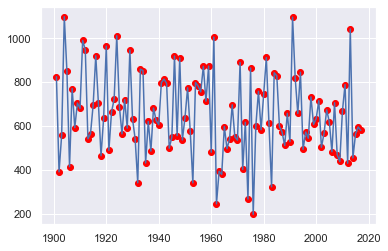

In [98]:
plt.plot(kerala.YEAR,kerala.JUN)
plt.scatter(kerala.YEAR,kerala.JUN,color='red',figsize=(15,7))

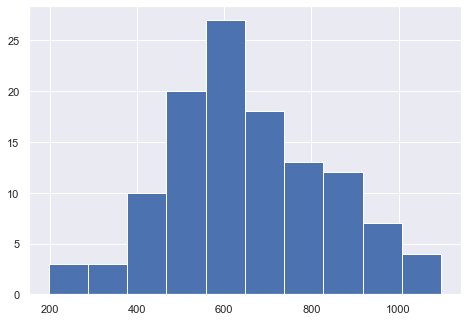

In [9]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.hist(kerala.JUN)
#ax.set_xticks(kerala.YEAR)
#ax.set_xticklabels(kerala.YEAR, rotation=90)
plt.show()

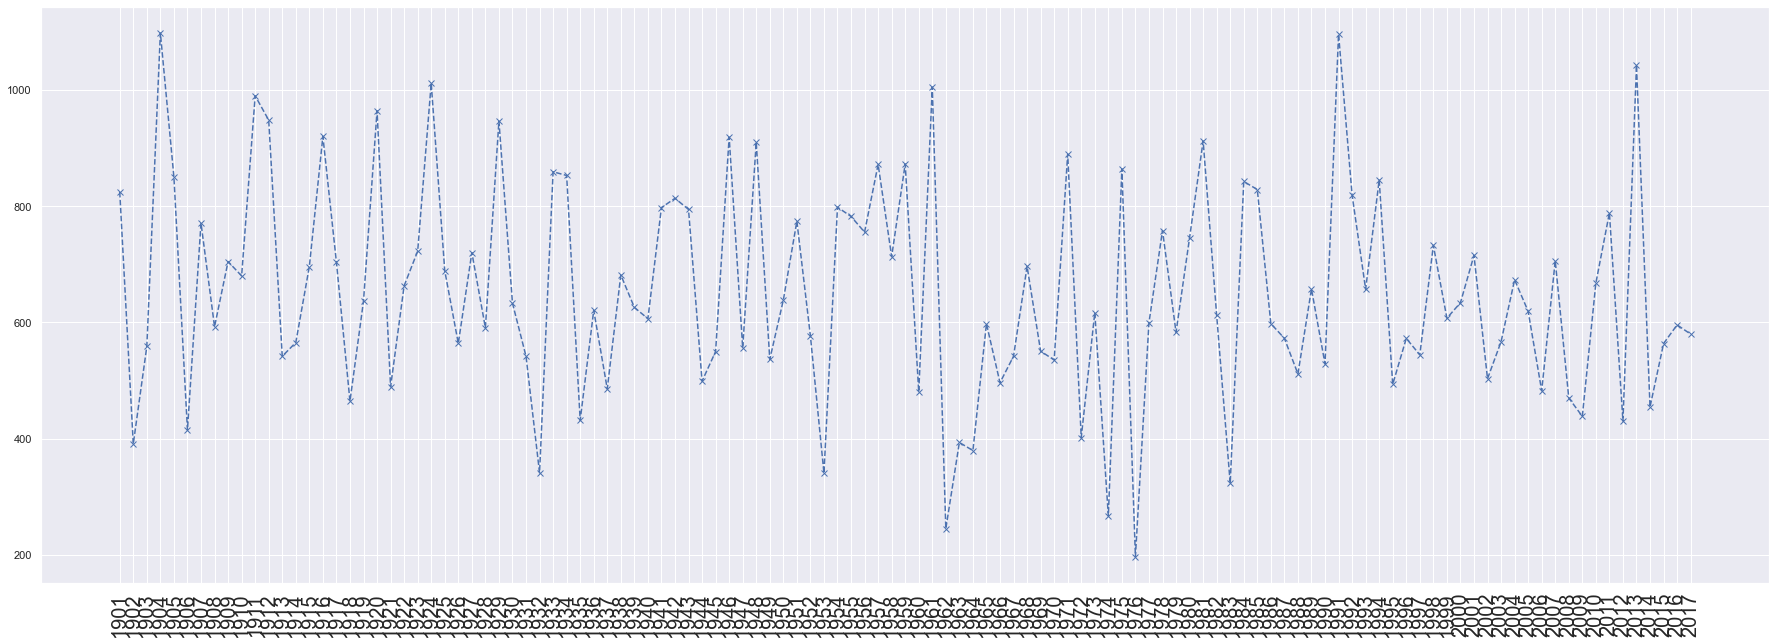

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,4,2])
ax.plot(kerala.YEAR,kerala.JUN,'bx--')
ax.set_xticks(kerala.YEAR)
ax.set_xticklabels(kerala.YEAR, rotation=90,fontsize=20)
plt.show()

### Line Plots For rain in kerala by Months

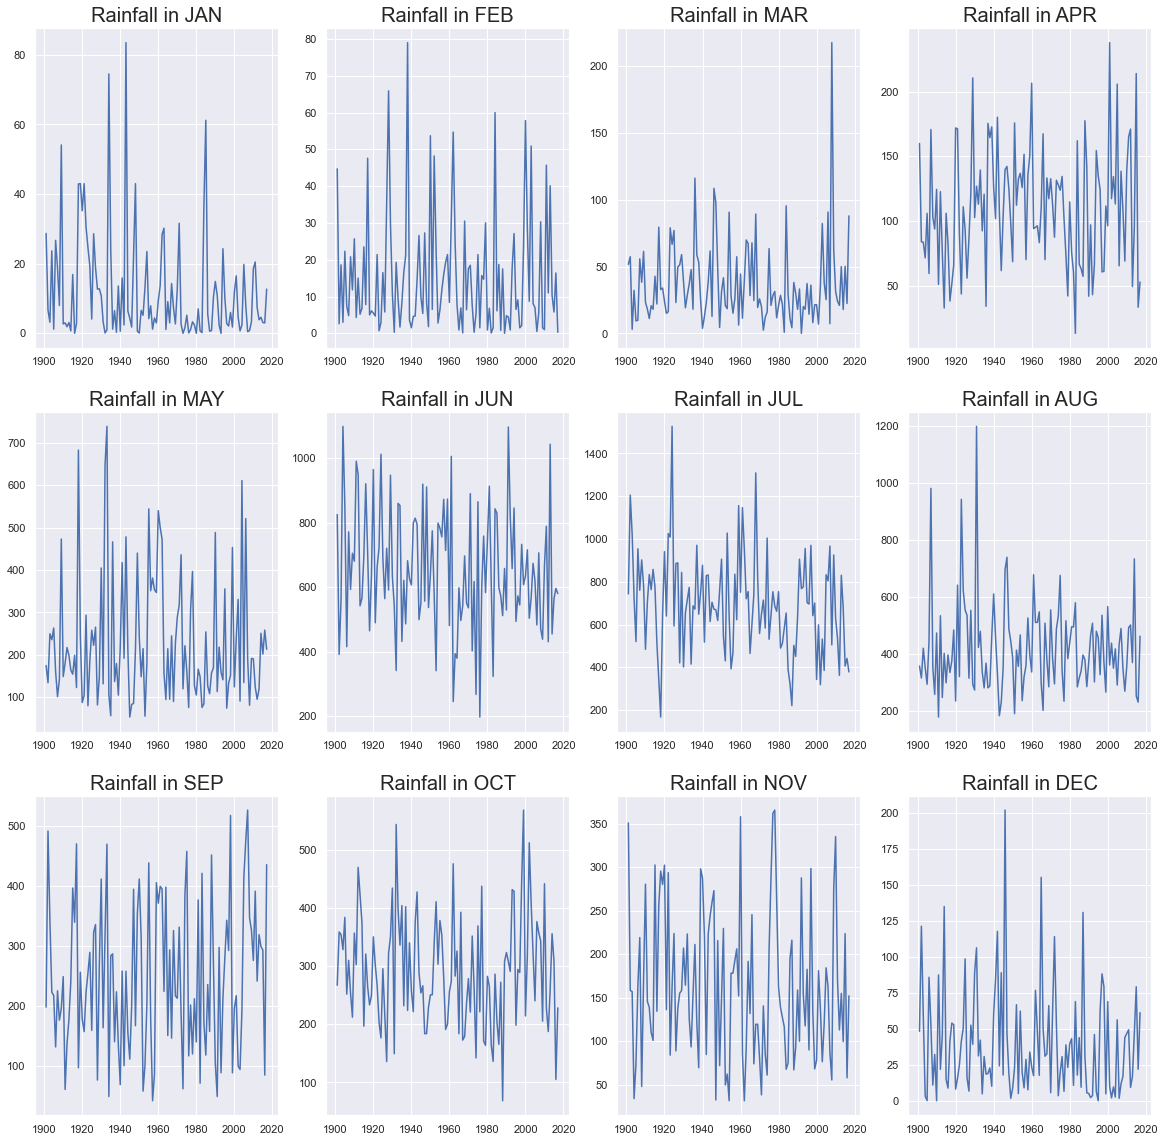

In [11]:
fig,a=plt.subplots(3,4)
a[0][0].plot(kerala.YEAR,kerala.JAN)
a[0][0].set_title('Rainfall in JAN',fontsize=20)
a[0][1].plot(kerala.YEAR,kerala.FEB)
a[0][1].set_title('Rainfall in FEB',fontsize=20)
a[0][2].plot(kerala.YEAR,kerala.MAR)
a[0][2].set_title('Rainfall in MAR',fontsize=20)
a[0][3].plot(kerala.YEAR,kerala.APR)
a[0][3].set_title('Rainfall in APR',fontsize=20)
a[1][0].plot(kerala.YEAR,kerala.MAY)
a[1][0].set_title('Rainfall in MAY',fontsize=20)
a[1][1].plot(kerala.YEAR,kerala.JUN)
a[1][1].set_title('Rainfall in JUN',fontsize=20)
a[1][2].plot(kerala.YEAR,kerala.JUL)
a[1][2].set_title('Rainfall in JUL',fontsize=20)
a[1][3].plot(kerala.YEAR,kerala.AUG)
a[1][3].set_title('Rainfall in AUG',fontsize=20)
a[2][0].plot(kerala.YEAR,kerala.SEP)
a[2][0].set_title('Rainfall in SEP',fontsize=20)
a[2][1].plot(kerala.YEAR,kerala.OCT)
a[2][1].set_title('Rainfall in OCT',fontsize=20)
a[2][2].plot(kerala.YEAR,kerala.NOV)
a[2][2].set_title('Rainfall in NOV',fontsize=20)
a[2][3].plot(kerala.YEAR,kerala.DEC)
a[2][3].set_title('Rainfall in DEC',fontsize=20)
fig.set_figheight(20)
fig.set_figwidth(20)
plt.show()

In [12]:
rain.describe().T

count         mean         std     min       25%      50%  \
YEAR            4187.0  1959.206831   33.709294  1901.0  1930.000  1959.00   
JAN             4183.0    18.937772   33.797148     0.0     0.600     5.90   
FEB             4184.0    21.604374   35.734572     0.0     0.500     6.50   
MAR             4181.0    27.395503   46.920068     0.0     1.000     7.90   
APR             4183.0    43.081712   68.156144     0.0     3.000    15.50   
MAY             4184.0    85.646511  122.706290     0.0     8.600    36.85   
JUN             4182.0   230.047704  234.276638     0.4    70.800   138.75   
JUL             4180.0   347.063780  268.867991     0.0   175.825   285.05   
AUG             4183.0   289.762156  188.444169     0.0   155.800   258.50   
SEP             4181.0   197.311863  135.563551     0.1   100.400   173.60   
OCT             4180.0    95.314713   99.204613     0.0    14.600    65.10   
NOV             4176.0    39.490685   68.365883     0.0     0.600     9.40   
DEC             4177.0    18.934858   43.003479     0.0     0.100     3.00   
ANNUAL          4161.0  1409.370031  902.693445    62.3   803.000  1120.20   
Jan-Feb         4181.0    40.527362   59.300319     0.0     4.000    18.90   
Mar-May         4178.0   155.798899  201.217676     0.0    24.000    74.75   
June-September  4177.0  1063.840938  706.750315    57.4   573.800   880.50   
Oct-Dec         4174.0   153.599018  166.852373     0.0    34.000    97.65   

                     75%     max  
YEAR            1988.000  2017.0  
JAN               22.000   583.7  
FEB               26.600   403.5  
MAR               31.300   605.6  
APR               49.700   595.1  
MAY               97.725  1168.6  
JUN              304.700  1609.9  
JUL              418.525  2362.8  
AUG              377.650  1664.6  
SEP              266.200  1222.0  
OCT              148.300   948.3  
NOV               45.300   648.9  
DEC               17.500   617.5  
ANNUAL          1642.900  6331.1  
Jan-Feb           50.200   699.5  
Mar-May          196.900  1745.8  
June-September  1287.500  4536.9  
Oct-Dec          211.725  1252.5

In [13]:
x = sm.add_constant(kerala.YEAR) 
result = sm.OLS(kerala.JUN, x).fit() 
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    JUN   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.164
Date:                Thu, 03 Dec 2020   Prob (F-statistic):             0.0779
Time:                        21:24:54   Log-Likelihood:                -775.48
No. Observations:                 117   AIC:                             1555.
Df Residuals:                     115   BIC:                             1560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2413.2044    989.567      2.439      0.0

#### Equation for staight line 

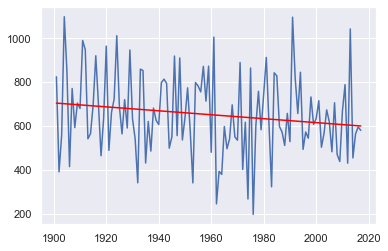

In [14]:
rainfall=2412.2044 - 0.8984*kerala.YEAR
plt.plot(kerala.YEAR,kerala.JUN)
plt.plot(kerala.YEAR,rainfall,color='red')

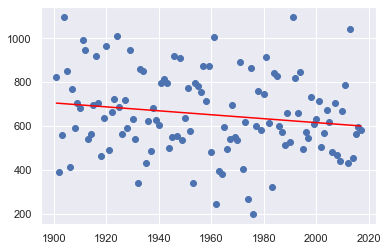

In [15]:
plt.scatter(kerala.YEAR,kerala.JUN)
plt.plot(kerala.YEAR,rainfall,color='red')

In [16]:
kerala[kerala.JUN==kerala.JUN.max()]

Name SUBDIVISION  YEAR   JAN  FEB   MAR   APR    MAY     JUN    JUL  \
3958  ROW3959      Kerala  1904  23.7  3.0  32.2  71.5  235.7  1098.2  725.5   

        AUG    SEP    OCT   NOV  DEC  ANNUAL  Jan-Feb  Mar-May  \
3958  351.8  222.7  328.1  33.9  3.3  3129.7     26.7    339.4   

      June-September  Oct-Dec  
3958          2398.2    365.3

In [17]:
rain[rain.JUN==rain.JUN.max()]

Name        SUBDIVISION  YEAR   JAN   FEB    MAR    APR    MAY     JUN  \
114  ROW115  Arunachal Pradesh  1918  10.4  11.0  191.2  144.6  861.1  1609.9   

        JUL    AUG    SEP    OCT  NOV   DEC  ANNUAL  Jan-Feb  Mar-May  \
114  1303.0  692.6  515.8  125.2  7.8  13.7  5486.3     21.4   1196.9   

     June-September  Oct-Dec  
114          4121.3    146.7

In [18]:
glob=pd.read_csv('GlobalLandTemp.csv')
glob.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

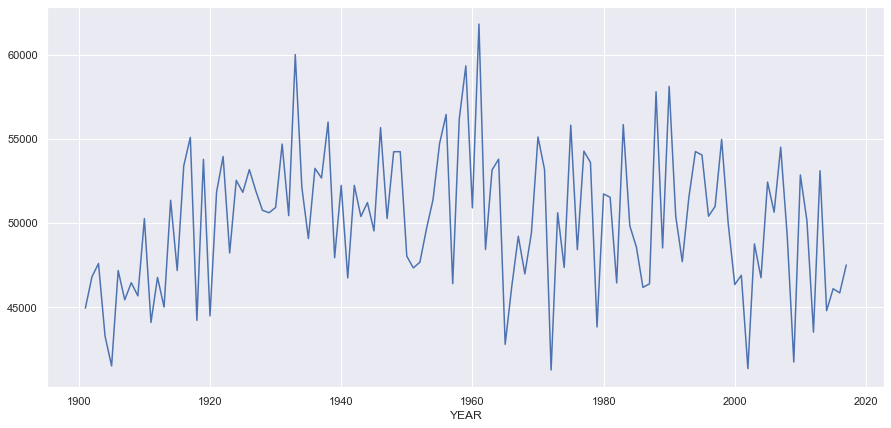

In [19]:
rain[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC','ANNUAL']].groupby("YEAR")['ANNUAL'].sum().plot(figsize=(15,7))

In [20]:
px.line(rain[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC','ANNUAL']].groupby("YEAR")['ANNUAL'].sum())

In [21]:
(rain.groupby("YEAR").sum()['ANNUAL'])

YEAR
1901    44947.5
1902    46805.6
1903    47596.9
1904    43287.0
1905    41516.2
         ...   
2013    53106.2
2014    44796.1
2015    46101.0
2016    45853.0
2017    47509.3
Name: ANNUAL, Length: 117, dtype: float64

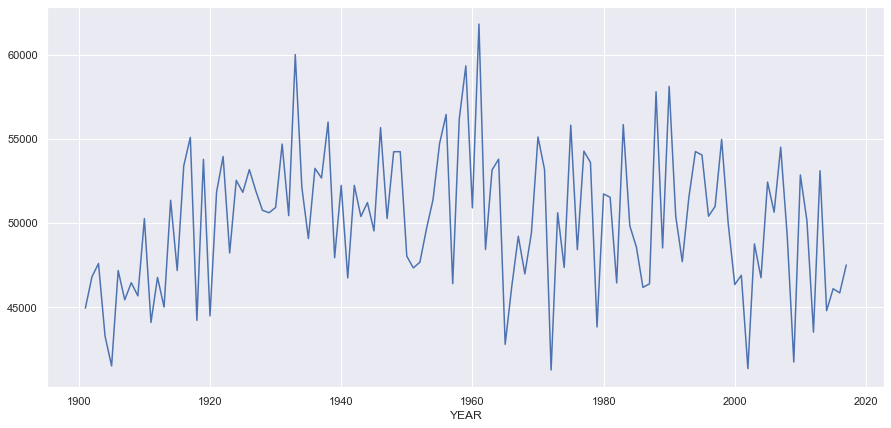

In [22]:
rain.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(15,7))

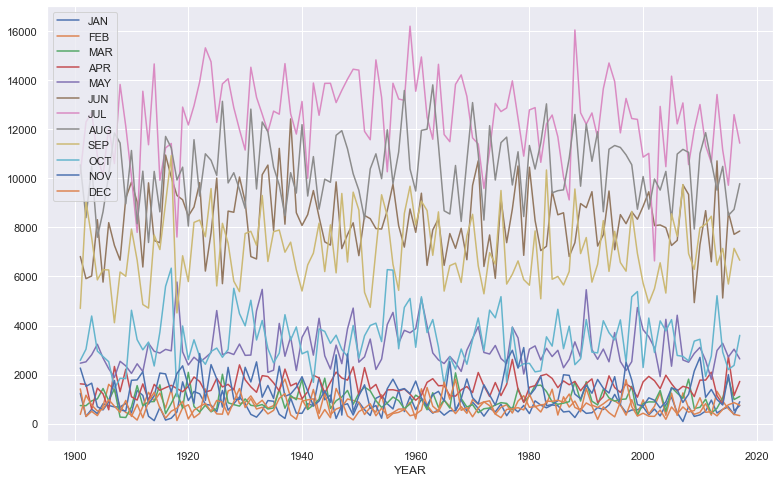

In [23]:
rain[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8))

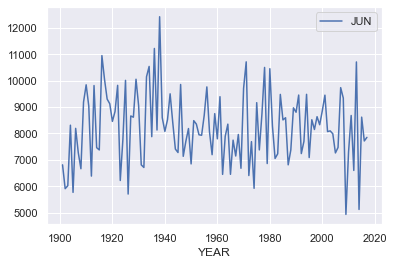

In [24]:
rain[['YEAR','JUN']].groupby("YEAR").sum().plot()

In [25]:
rain.describe()

YEAR          JAN          FEB          MAR          APR  \
count  4187.000000  4183.000000  4184.000000  4181.000000  4183.000000   
mean   1959.206831    18.937772    21.604374    27.395503    43.081712   
std      33.709294    33.797148    35.734572    46.920068    68.156144   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1930.000000     0.600000     0.500000     1.000000     3.000000   
50%    1959.000000     5.900000     6.500000     7.900000    15.500000   
75%    1988.000000    22.000000    26.600000    31.300000    49.700000   
max    2017.000000   583.700000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4184.000000  4182.000000  4180.000000  4183.000000  4181.000000   
mean     85.646511   230.047704   347.063780   289.762156   197.311863   
std     122.706290   234.276638   268.867991   188.444169   135.563551   
min       0.000000     0.400000     0.000000     0.000000     0.100000   
25%       8.600000    70.800000   175.825000   155.800000   100.400000   
50%      36.850000   138.750000   285.050000   258.500000   173.600000   
75%      97.725000   304.700000   418.525000   377.650000   266.200000   
max    1168.600000  1609.900000  2362.800000  1664.600000  1222.000000   

               OCT          NOV          DEC       ANNUAL      Jan-Feb  \
count  4180.000000  4176.000000  4177.000000  4161.000000  4181.000000   
mean     95.314713    39.490685    18.934858  1409.370031    40.527362   
std      99.204613    68.365883    43.003479   902.693445    59.300319   
min       0.000000     0.000000     0.000000    62.300000     0.000000   
25%      14.600000     0.600000     0.100000   803.000000     4.000000   
50%      65.100000     9.400000     3.000000  1120.200000    18.900000   
75%     148.300000    45.300000    17.500000  1642.900000    50.200000   
max     948.300000   648.900000   617.500000  6331.100000   699.500000   

           Mar-May  June-September      Oct-Dec  
count  4178.000000     4177.000000  4174.000000  
mean    155.798899     1063.840938   153.599018  
std     201.217676      706.750315   166.852373  
min       0.000000       57.400000     0.000000  
25%      24.000000      573.800000    34.000000  
50%      74.750000      880.500000    97.650000  
75%     196.900000     1287.500000   211.725000  
max    1745.800000     4536.900000  1252.500000

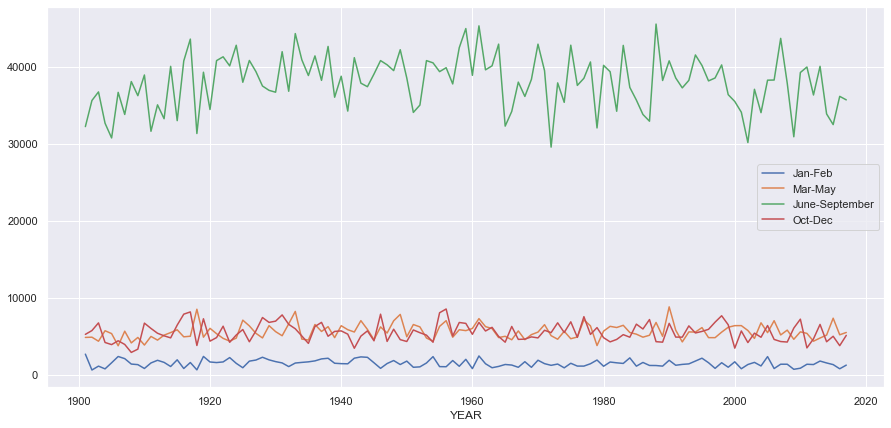

In [26]:
rain[['YEAR','Jan-Feb','Mar-May','June-September','Oct-Dec']].groupby('YEAR').sum().plot(figsize=(15,7))

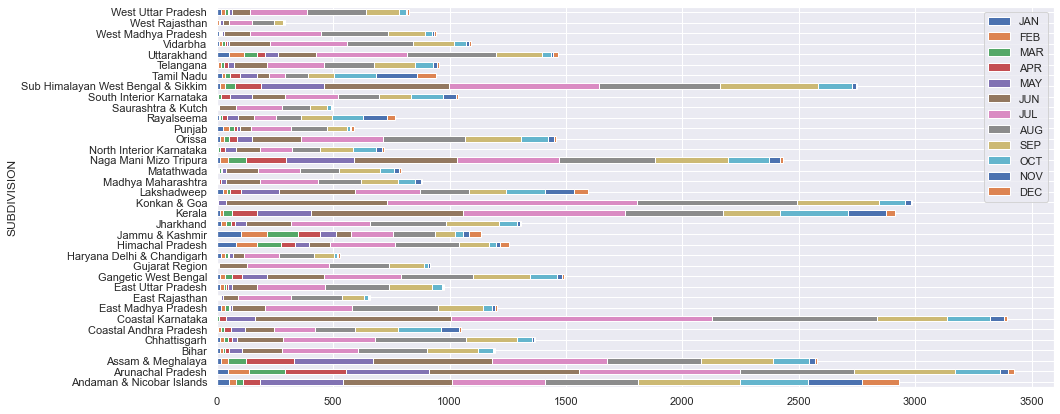

In [27]:
rain[['SUBDIVISION','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].groupby('SUBDIVISION').mean().plot.barh(stacked=True,figsize=(15,7))

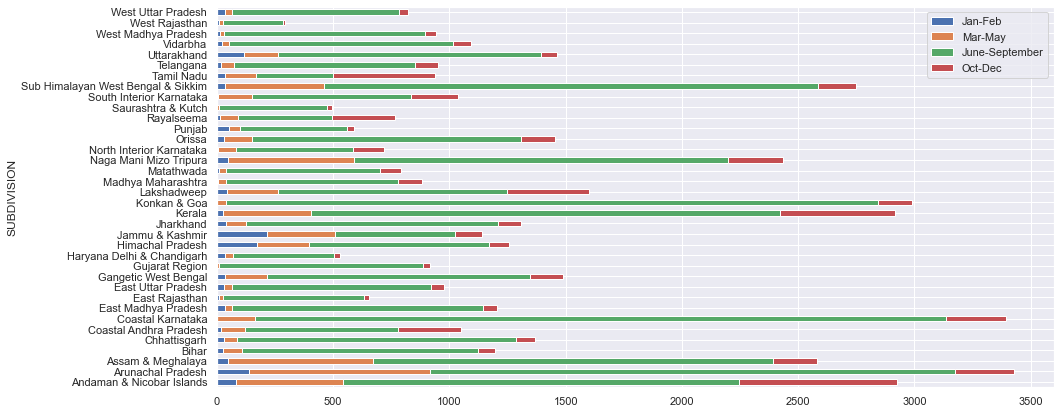

In [28]:
rain[['SUBDIVISION','Jan-Feb','Mar-May','June-September','Oct-Dec']].groupby('SUBDIVISION').mean().plot.barh(stacked=True,figsize=(15,7))

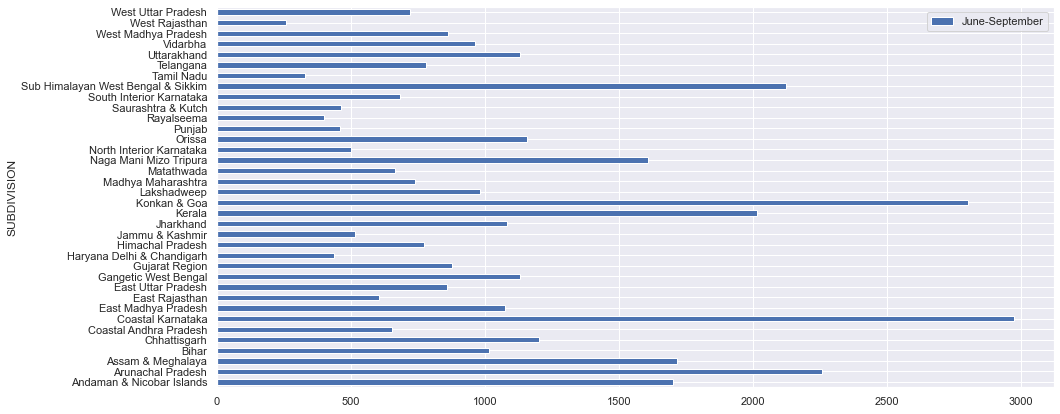

In [29]:
rain[['SUBDIVISION','June-September']].groupby('SUBDIVISION').mean().plot.barh(stacked=True,figsize=(15,7))

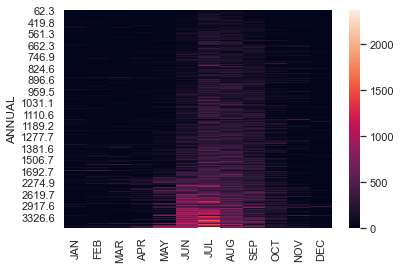

In [30]:
sns.heatmap(data=rain[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].groupby('ANNUAL').mean())

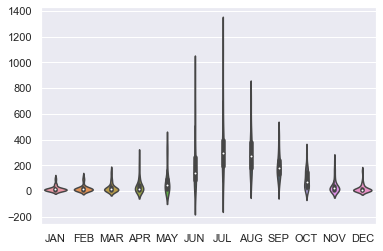

In [31]:
sns.violinplot(data=rain[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','SUBDIVISION']].groupby('SUBDIVISION').mean())

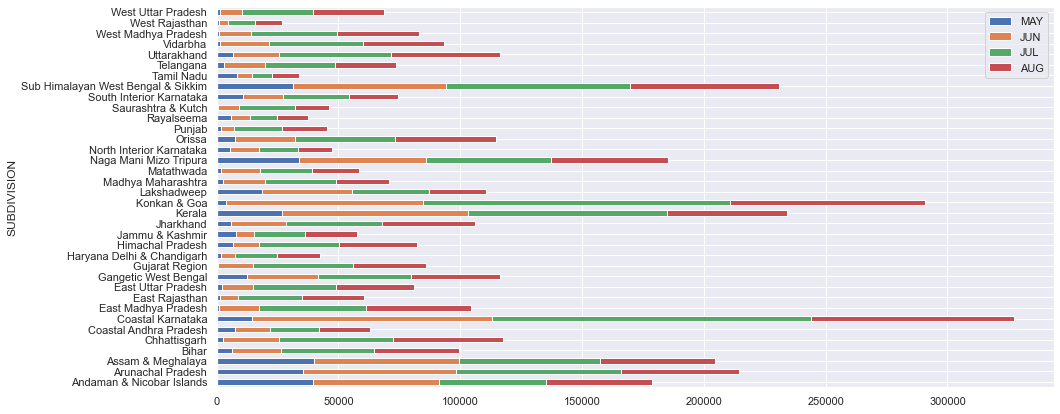

In [32]:
rain[['MAY','JUN','JUL','AUG','SUBDIVISION']].groupby('SUBDIVISION').sum().plot.barh(stacked=True,figsize=(15,7))

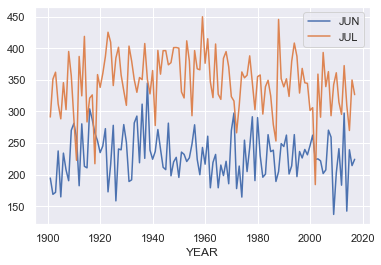

In [33]:
rain[['JUN','JUL','YEAR']].groupby('YEAR').mean().plot()

## Using regression to calculate the rainfall

In [34]:
datum=rain.copy()

In [35]:
datum=datum.drop(['Name','SUBDIVISION'],axis=1)

In [36]:
datum.head()

YEAR   JAN    FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  49.2   87.1  29.2    2.3  528.8  517.5  365.1  481.1  332.6  388.5   
1  1902   0.0  159.8  12.2    0.0  446.1  537.1  228.9  753.7  666.2  197.2   
2  1903  12.7  144.0   0.0    1.0  235.1  479.9  728.4  326.7  339.0  181.2   
3  1904   9.4   14.7   0.0  202.4  304.5  495.1  502.0  160.1  820.4  222.2   
4  1905   1.3    0.0   3.3   26.9  279.5  628.7  368.7  330.5  297.0  260.7   

     NOV    DEC  ANNUAL  Jan-Feb  Mar-May  June-September  Oct-Dec  
0  558.2   33.6  3373.2    136.3    560.3          1696.3    980.3  
1  359.0  160.5  3520.7    159.8    458.3          2185.9    716.7  
2  284.4  225.0  2957.4    156.7    236.1          1874.0    690.6  
3  308.7   40.1  3079.6     24.1    506.9          1977.6    571.0  
4   25.4  344.7  2566.7      1.3    309.7          1624.9    630.8

In [37]:
rain[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','Jan-Feb','Mar-May','June-September','Oct-Dec']].groupby('YEAR').mean()

JAN        FEB        MAR        APR        MAY         JUN  \
YEAR                                                                      
1901  35.220000  40.508571  21.097143  46.388571  70.434286  194.608571   
1902   8.520000   8.305714  20.951429  45.771429  72.040000  168.820000   
1903  16.851429  14.342857  26.577143  16.974286  80.237143  171.988571   
1904  11.697143   9.391429  28.880000  41.402857  92.454286  237.485714   
1905  23.200000  20.477143  40.940000  34.754286  76.437143  164.805714   
...         ...        ...        ...        ...        ...         ...   
2013  12.108333  36.563889  17.477778  31.600000  82.802778  297.419444   
2014  16.180556  25.647222  29.441667  22.052778  91.013889  142.261111   
2015  19.052778  16.825000  51.730556  76.225000  75.525000  239.355556   
2016  10.252778  10.527778  27.338889  31.913889  84.333333  214.302778   
2017  25.574286   9.382857  31.717143  49.197143  75.374286  224.308571   

             JUL         AUG         SEP         OCT        NOV        DEC  \
YEAR                                                                         
1901  291.208571  301.325714  134.154286   73.697143  64.757143  10.808571   
1902  351.145714  239.800000  258.611429   86.714286  43.457143  33.151429   
1903  362.108571  299.482857  216.620000  125.345714  48.523529  22.311765   
1904  311.971429  217.014286  167.402857   84.551429  19.757143  14.771429   
1905  288.314286  246.780000  179.260000   78.168571  16.025714  17.005714   
...          ...         ...         ...         ...        ...        ...   
2013  372.566667  264.338889  179.247222  144.813889  27.391667   8.819444   
2014  309.733333  291.225000  198.372222   81.152778  21.113889  16.166667   
2015  269.872222  235.713889  158.061111   61.230556  55.566667  21.411111   
2016  349.777778  242.527778  198.419444   66.061111  14.475000  23.775000   
2017  326.597143  279.445714  190.294286  102.828571  21.182857  21.497143   

           ANNUAL    Jan-Feb     Mar-May  June-September     Oct-Dec  
YEAR                                                                  
1901  1284.214286  75.722857  137.920000      921.305714  149.262857  
1902  1337.302857  16.814286  138.777143     1018.385714  163.334286  
1903  1399.908824  31.197143  123.768571     1050.194286  197.535294  
1904  1236.771429  21.077143  162.734286      933.874286  119.085714  
1905  1186.177143  43.674286  152.128571      879.171429  111.205714  
...           ...        ...         ...             ...         ...  
2013  1475.172222  48.675000  131.880556     1113.575000  181.025000  
2014  1244.336111  41.830556  142.500000      941.572222  118.419444  
2015  1280.583333  35.875000  203.477778      903.008333  138.222222  
2016  1273.694444  20.777778  143.588889     1005.025000  104.302778  
2017  1357.408571  34.957143  156.288571     1020.651429  145.517143  

[117 rows x 17 columns]

In [38]:
temp=pd.read_csv('temp.csv')
temp

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  13.58  14.72  17.91  20.93  23.18  24.05  23.82  23.58  22.09   
1    1902  13.08  14.20  18.44  21.30  23.63  23.97  23.68  23.34  22.11   
2    1903  13.20  14.55  17.12  20.67  22.95  23.85  23.53  23.29  22.84   
3    1904  13.04  14.07  17.70  21.42  23.02  23.64  23.35  23.03  21.65   
4    1905  12.83  12.74  16.88  19.62  23.32  24.13  23.93  24.31  22.47   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  2013  13.22  15.54  18.45  21.29  23.68  24.08  23.94  23.70  22.70   
113  2014  13.79  14.72  17.73  21.07  23.16  24.68  24.37  23.58  22.57   
114  2015  13.51  15.55  17.99  21.18  23.54  23.82  24.28  23.82  22.52   
115  2016  14.91  17.44  20.59  23.75  25.10  25.36  24.72  24.56  23.78   
116  2017  14.72  16.71  19.55  23.40  25.09  25.07  24.74  24.52  24.01   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0    20.20  16.16  13.41   19.51    14.16    20.67    23.38    16.59  
1    19.63  16.35  13.53   19.44    13.64    21.12    23.28    16.50  
2    20.12  15.84  12.93   19.25    13.87    20.25    23.40    16.29  
3    19.50  15.77  14.06   19.22    13.72    20.72    22.96    16.44  
4    21.65  16.63  13.59   19.03    12.81    19.97    23.43    16.39  
..     ...    ...    ...     ...      ...      ...      ...      ...  
112  21.69  16.52  14.01   19.83    14.38    21.14    23.61    16.82  
113  20.51  17.07  14.02   19.77    14.26    20.66    23.80    17.20  
114  20.68  17.81  14.75   19.96    14.53    20.91    23.62    17.75  
115  21.65  17.68  15.78   21.28    16.17    23.15    24.61    18.37  
116  22.19  18.25  15.76   21.17    15.72    22.68    24.58    18.73  

[117 rows x 18 columns]

In [39]:
temp[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','JAN-FEB','MAR-MAY','JUN-SEP','OCT-DEC']].describe().T

count       mean       std    min    25%    50%    75%    max
JAN      117.0  13.167009  0.577599  12.06  12.82  13.10  13.51  14.91
FEB      117.0  14.656239  0.769013  12.74  14.19  14.57  15.10  17.44
MAR      117.0  17.774872  0.652685  16.62  17.28  17.73  18.07  20.59
APR      117.0  21.054274  0.669091  19.62  20.55  21.07  21.46  23.75
MAY      117.0  23.233846  0.620910  21.95  22.88  23.19  23.56  25.74
JUN      117.0  23.838291  0.385172  22.97  23.62  23.82  24.06  25.36
JUL      117.0  23.718462  0.306961  22.65  23.53  23.72  23.86  24.74
AUG      117.0  23.386838  0.334622  22.58  23.20  23.34  23.56  24.56
SEP      117.0  22.228974  0.401537  21.45  21.95  22.22  22.46  24.01
OCT      117.0  19.735299  0.597879  18.80  19.34  19.61  19.97  22.19
NOV      117.0  16.255470  0.722024  14.80  15.78  16.22  16.70  18.25
DEC      117.0  13.735641  0.677936  12.04  13.35  13.72  14.10  15.78
ANNUAL   117.0  19.385043  0.380822  18.62  19.20  19.31  19.53  21.28
JAN-FEB  117.0  13.894615  0.570291  12.70  13.57  13.84  14.16  16.17
MAR-MAY  117.0  20.668462  0.518931  19.72  20.30  20.67  20.94  23.15
JUN-SEP  117.0  23.289316  0.297657  22.51  23.14  23.27  23.41  24.61
OCT-DEC  117.0  16.557265  0.533045  15.52  16.24  16.46  16.81  18.73

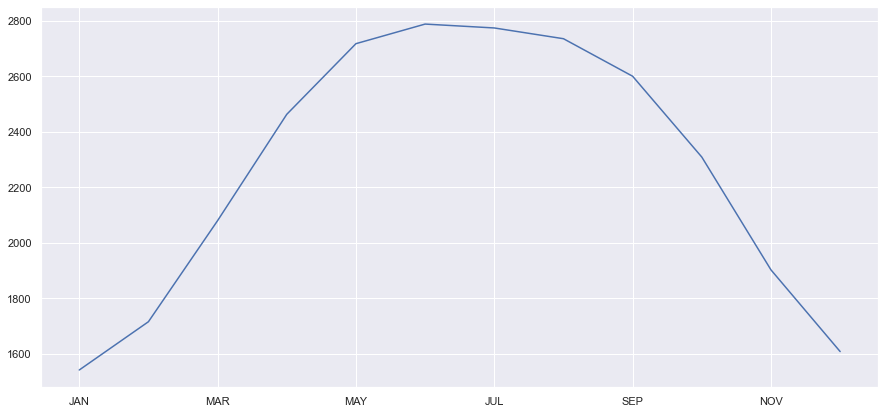

In [40]:
temp[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].sum().plot(figsize=(15,7))

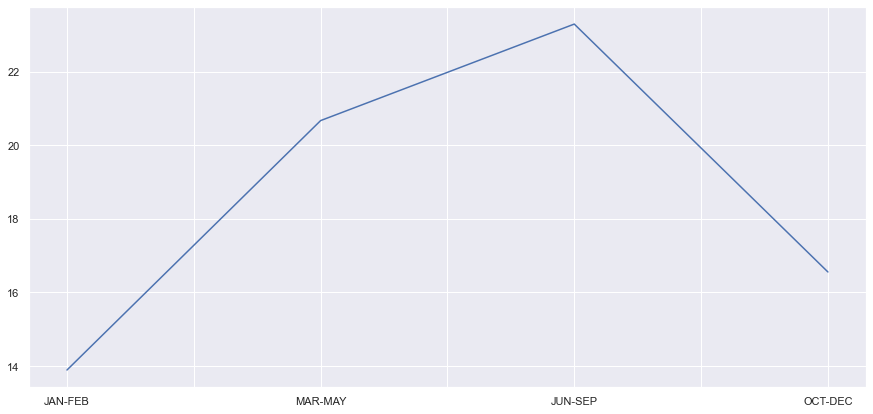

In [41]:
temp[['JAN-FEB','MAR-MAY','JUN-SEP','OCT-DEC']].mean().plot(figsize=(15,7))

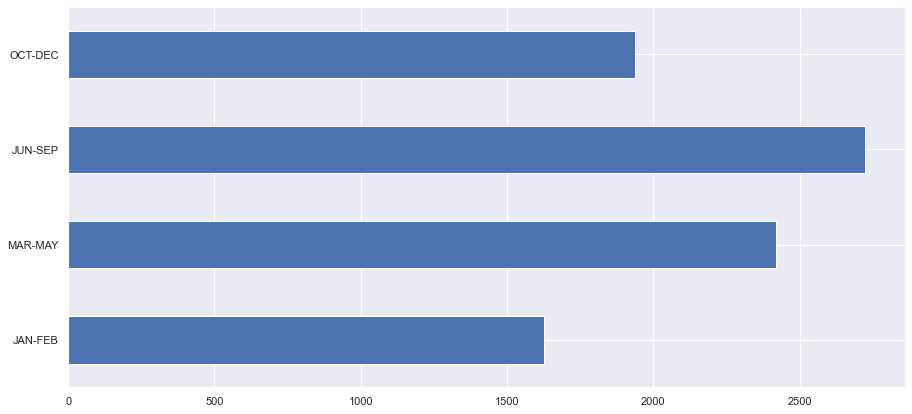

In [42]:
temp[['JAN-FEB','MAR-MAY','JUN-SEP','OCT-DEC']].sum().plot.barh(stacked=True,figsize=(15,7))

# Creating a Dashboard

In [43]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")
fig

In [44]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.read_csv('Rainfall_Data.csv')


fig = px.bar(df[['SUBDIVISION','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].groupby('SUBDIVISION').mean(),orientation='h')
fig

In [45]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.read_csv('Rainfall_Data.csv')


fig = px.scatter(df[['SUBDIVISION','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].groupby('SUBDIVISION').mean())
fig

In [46]:
fig = px.scatter(df, x="YEAR", y="ANNUAL",
                  color="SUBDIVISION", hover_name="SUBDIVISION",
                 log_x=True, size_max=60)
fig

In [47]:
for i in ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']:
    t = df.YEAR
    y = df[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].groupby('YEAR')[i].mean()
    fig = go.Figure(data=go.Scatter(x=t, y=y, mode='markers'))
fig

In [48]:
for i in ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']:
    print(i)

JAN
FEB
MAR
APR
MAY
JUN
JUL
AUG
SEP
OCT
NOV
DEC


In [49]:
data=df[['SUBDIVISION','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','Jan-Feb','Mar-May','June-September','Oct-Dec']].groupby('SUBDIVISION').mean()

In [50]:
data=data.T
data

SUBDIVISION     Andaman & Nicobar Islands  Arunachal Pradesh  \
JAN                             54.382143          46.716327   
FEB                             27.685714          90.883673   
MAR                             31.594545         153.972165   
APR                             71.916364         265.387879   
MAY                            354.829730         356.693939   
JUN                            470.083636         641.817347   
JUL                            399.047273         691.165306   
AUG                            398.613636         491.307071   
SEP                            440.382569         432.005051   
OCT                            289.989091         194.793814   
NOV                            233.018182          35.149485   
DEC                            157.466972          24.079381   
ANNUAL                        2926.373585        3403.959140   
Jan-Feb                         82.067857         137.602041   
Mar-May                        459.419266         777.810309   
June-September                1703.708257        2258.214433   
Oct-Dec                        678.759633         253.648958   

SUBDIVISION     Assam & Meghalaya        Bihar  Chhattisgarh  \
JAN                     16.860684    13.242735     14.023932   
FEB                     31.363248    14.152991     18.966667   
MAR                     79.221368    10.194017     15.245299   
APR                    205.102564    16.848718     16.530769   
MAY                    340.849573    53.573504     20.989744   
JUN                    508.741880   173.158974    197.859829   
JUL                    494.565812   325.188889    398.082906   
AUG                    403.389744   298.740171    388.828205   
SEP                    310.693162   217.835043    218.102564   
OCT                    152.497436    62.944444     63.780342   
NOV                     26.892308     7.055556     11.572650   
DEC                      8.955556     3.631624      5.158974   
ANNUAL                2579.133333  1196.563248   1369.136752   
Jan-Feb                 48.220513    27.392308     32.988034   
Mar-May                625.179487    80.618803     52.768376   
June-September        1717.388889  1014.923932   1202.876923   
Oct-Dec                188.353846    73.638462     80.505983   

SUBDIVISION     Coastal Andhra Pradesh  Coastal Karnataka  \
JAN                           7.377778           1.918103   
FEB                          12.710256           1.492308   
MAR                          13.132479           6.271795   
APR                          26.384615          30.501709   
MAY                          62.776068         122.597436   
JUN                         124.474359         842.282051   
JUL                         173.286325        1121.294872   
AUG                         175.895726         710.791453   
SEP                         181.731624         299.165812   
OCT                         183.901709         183.646154   
NOV                          77.082906          62.809402   
DEC                          11.550427          12.508547   
ANNUAL                     1050.304274        3397.637931   
Jan-Feb                      20.085470           3.326724   
Mar-May                     102.296581         159.360684   
June-September              655.380342        2973.528205   
Oct-Dec                     272.535897         258.965812   

SUBDIVISION     East Madhya Pradesh  East Rajasthan  East Uttar Pradesh  ...  \
JAN                       19.282051        6.389744           15.866667  ...   
FEB                       18.449573        5.328205           15.614530  ...   
MAR                       13.571795        4.518803            8.873504  ...   
APR                        7.066667        3.096581            6.337607  ...   
MAY                        9.364957        9.862393           17.473504  ...   
JUN                      140.482051       63.611111          109.912821  ...   
JUL                      372.773504

In [51]:
df.SUBDIVISION.unique()

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

In [52]:
df[df['SUBDIVISION']=='Andaman & Nicobar Islands']['ANNUAL'].mean()

2926.3735849056598

In [53]:
np.mean(df['JAN'])

18.937771934018638

In [54]:
px.scatter(data[['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep']])

In [55]:
df

Name                SUBDIVISION  YEAR   JAN    FEB   MAR    APR  \
0        ROW1  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3   
1        ROW2  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0   
2        ROW3  Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0   
3        ROW4  Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4   
4        ROW5  Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9   
...       ...                        ...   ...   ...    ...   ...    ...   
4182  ROW4183                Lakshadweep  2012  19.2    0.1   1.6   76.8   
4183  ROW4184                Lakshadweep  2013  26.2   34.4  37.5    5.3   
4184  ROW4185                Lakshadweep  2014  53.2   16.1   4.4   14.9   
4185  ROW4186                Lakshadweep  2015   2.2    0.5   3.7   87.1   
4186  ROW4187                Lakshadweep  2016  59.6   12.1   3.2    2.6   

        MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0     528.8  517.5  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3   
1     446.1  537.1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8   
2     235.1  479.9  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7   
3     304.5  495.1  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1   
4     279.5  628.7  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3   
...     ...    ...    ...    ...    ...    ...    ...    ...     ...      ...   
4182   21.2  327.0  231.5  381.2  179.8  145.9   12.4    8.8  1405.5     19.3   
4183   88.3  426.2  296.4  154.4  180.0   72.8   78.1   26.7  1426.3     60.6   
4184   57.4  244.1  116.1  466.1  132.2  169.2   59.0   62.3  1395.0     69.3   
4185  133.1  296.6  257.5  146.4  160.4  165.4  231.0  159.0  1642.9      2.7   
4186   77.4  321.1  262.6   86.2   75.6   58.6   32.0   74.7  1065.7     71.7   

      Mar-May  June-September  Oct-Dec  
0       560.3          1696.3    980.3  
1       458.3          2185.9    716.7  
2       236.1          1874.0    690.6  
3       506.9          1977.6    571.0  
4       309.7          1624.9    630.8  
...       ...             ...      ...  
4182     99.6          1119.5    167.1  
4183    131.1          1057.0    177.6  
4184     76.7           958.5    290.5  
4185    223.9           860.9    555.4  
4186     83.2           745.4    165.4  

[4187 rows x 20 columns]

In [56]:
test=df.T

In [57]:
test

0                          1     \
Name                                 ROW1                       ROW2   
SUBDIVISION     Andaman & Nicobar Islands  Andaman & Nicobar Islands   
YEAR                                 1901                       1902   
JAN                                  49.2                          0   
FEB                                  87.1                      159.8   
MAR                                  29.2                       12.2   
APR                                   2.3                          0   
MAY                                 528.8                      446.1   
JUN                                 517.5                      537.1   
JUL                                 365.1                      228.9   
AUG                                 481.1                      753.7   
SEP                                 332.6                      666.2   
OCT                                 388.5                      197.2   
NOV                                 558.2                        359   
DEC                                  33.6                      160.5   
ANNUAL                             3373.2                     3520.7   
Jan-Feb                             136.3                      159.8   
Mar-May                             560.3                      458.3   
June-September                     1696.3                     2185.9   
Oct-Dec                             980.3                      716.7   

                                     2                          3     \
Name                                 ROW3                       ROW4   
SUBDIVISION     Andaman & Nicobar Islands  Andaman & Nicobar Islands   
YEAR                                 1903                       1904   
JAN                                  12.7                        9.4   
FEB                                   144                       14.7   
MAR                                     0                          0   
APR                                     1                      202.4   
MAY                                 235.1                      304.5   
JUN                                 479.9                      495.1   
JUL                                 728.4                        502   
AUG                                 326.7                      160.1   
SEP                                   339                      820.4   
OCT                                 181.2                      222.2   
NOV                                 284.4                      308.7   
DEC                                   225                       40.1   
ANNUAL                             2957.4                     3079.6   
Jan-Feb                             156.7                       24.1   
Mar-May                             236.1                      506.9   
June-September                       1874                     1977.6   
Oct-Dec                             690.6                        571   

                                     4                          5     \
Name                                 ROW5                       ROW6   
SUBDIVISION     Andaman & Nicobar Islands  Andaman & Nicobar Islands   
YEAR                                 1905                       1906   
JAN                                   1.3                       36.6   
FEB                                     0                          0   
MAR                                   3.3                          0   
APR                                  26.9                          0   
MAY                                 279.5                      556.1   
JUN                                 628.7                      733.3   
JUL                                 368.7                      247.7   
AUG                                 330.5                      320.5   
SEP                                   297                      164.3   
OCT                                 260.7                      267.8   
NOV

In [61]:
df

Name                SUBDIVISION  YEAR   JAN    FEB   MAR    APR  \
0        ROW1  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3   
1        ROW2  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0   
2        ROW3  Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0   
3        ROW4  Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4   
4        ROW5  Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9   
...       ...                        ...   ...   ...    ...   ...    ...   
4182  ROW4183                Lakshadweep  2012  19.2    0.1   1.6   76.8   
4183  ROW4184                Lakshadweep  2013  26.2   34.4  37.5    5.3   
4184  ROW4185                Lakshadweep  2014  53.2   16.1   4.4   14.9   
4185  ROW4186                Lakshadweep  2015   2.2    0.5   3.7   87.1   
4186  ROW4187                Lakshadweep  2016  59.6   12.1   3.2    2.6   

        MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0     528.8  517.5  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3   
1     446.1  537.1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8   
2     235.1  479.9  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7   
3     304.5  495.1  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1   
4     279.5  628.7  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3   
...     ...    ...    ...    ...    ...    ...    ...    ...     ...      ...   
4182   21.2  327.0  231.5  381.2  179.8  145.9   12.4    8.8  1405.5     19.3   
4183   88.3  426.2  296.4  154.4  180.0   72.8   78.1   26.7  1426.3     60.6   
4184   57.4  244.1  116.1  466.1  132.2  169.2   59.0   62.3  1395.0     69.3   
4185  133.1  296.6  257.5  146.4  160.4  165.4  231.0  159.0  1642.9      2.7   
4186   77.4  321.1  262.6   86.2   75.6   58.6   32.0   74.7  1065.7     71.7   

      Mar-May  June-September  Oct-Dec  
0       560.3          1696.3    980.3  
1       458.3          2185.9    716.7  
2       236.1          1874.0    690.6  
3       506.9          1977.6    571.0  
4       309.7          1624.9    630.8  
...       ...             ...      ...  
4182     99.6          1119.5    167.1  
4183    131.1          1057.0    177.6  
4184     76.7           958.5    290.5  
4185    223.9           860.9    555.4  
4186     83.2           745.4    165.4  

[4187 rows x 20 columns]

In [62]:
df

Name                SUBDIVISION  YEAR   JAN    FEB   MAR    APR  \
0        ROW1  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3   
1        ROW2  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0   
2        ROW3  Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0   
3        ROW4  Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4   
4        ROW5  Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9   
...       ...                        ...   ...   ...    ...   ...    ...   
4182  ROW4183                Lakshadweep  2012  19.2    0.1   1.6   76.8   
4183  ROW4184                Lakshadweep  2013  26.2   34.4  37.5    5.3   
4184  ROW4185                Lakshadweep  2014  53.2   16.1   4.4   14.9   
4185  ROW4186                Lakshadweep  2015   2.2    0.5   3.7   87.1   
4186  ROW4187                Lakshadweep  2016  59.6   12.1   3.2    2.6   

        MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0     528.8  517.5  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3   
1     446.1  537.1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8   
2     235.1  479.9  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7   
3     304.5  495.1  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1   
4     279.5  628.7  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3   
...     ...    ...    ...    ...    ...    ...    ...    ...     ...      ...   
4182   21.2  327.0  231.5  381.2  179.8  145.9   12.4    8.8  1405.5     19.3   
4183   88.3  426.2  296.4  154.4  180.0   72.8   78.1   26.7  1426.3     60.6   
4184   57.4  244.1  116.1  466.1  132.2  169.2   59.0   62.3  1395.0     69.3   
4185  133.1  296.6  257.5  146.4  160.4  165.4  231.0  159.0  1642.9      2.7   
4186   77.4  321.1  262.6   86.2   75.6   58.6   32.0   74.7  1065.7     71.7   

      Mar-May  June-September  Oct-Dec  
0       560.3          1696.3    980.3  
1       458.3          2185.9    716.7  
2       236.1          1874.0    690.6  
3       506.9          1977.6    571.0  
4       309.7          1624.9    630.8  
...       ...             ...      ...  
4182     99.6          1119.5    167.1  
4183    131.1          1057.0    177.6  
4184     76.7           958.5    290.5  
4185    223.9           860.9    555.4  
4186     83.2           745.4    165.4  

[4187 rows x 20 columns]

## Correlation between Carbon Emmisions and annual rainfall

In [63]:
co_em=pd.read_csv('CO2em.csv')
co_em

Year Fossil CO2 Emissions (tons) CO2 emisions change  \
0   1971                23,21,97,160               0.39%   
1   1972                24,19,79,650               4.21%   
2   1973                24,07,03,000              -0.53%   
3   1974                25,85,19,060               7.40%   
4   1975                27,60,05,140               6.76%   
5   1976                29,49,79,310               6.87%   
6   1977                30,02,77,290               1.80%   
7   1978                28,60,97,920              -4.72%   
8   1979                30,81,14,280               7.70%   
9   1980                32,19,37,220               4.49%   
10  1981                35,72,50,000              10.97%   
11  1982                38,30,64,210               7.23%   
12  1983                40,69,01,830               6.22%   
13  1984                44,45,88,050               9.26%   
14  1985                46,61,33,290               4.85%   
15  1986                50,62,82,300               8.61%   
16  1987                54,16,68,630               6.99%   
17  1988                57,63,01,090               6.39%   
18  1989                61,81,51,880               7.26%   
19  1990                65,54,61,620               6.04%   
20  1991                69,88,28,070               6.62%   
21  1992                73,55,68,820               5.26%   
22  1993                76,46,27,990               3.95%   
23  1994                81,07,22,880               6.03%   
24  1995                86,97,95,250               7.29%   
25  1996                91,64,54,000               5.36%   
26  1997                95,90,20,340               4.64%   
27  1998                97,37,47,170               1.54%   
28  1999              1,04,48,73,720               7.30%   
29  2000              1,06,44,31,150               1.87%   
30  2001              1,08,21,42,730               1.66%   
31  2002              1,11,64,81,480               3.17%   
32  2003              1,15,05,57,280               3.05%   
33  2004              1,20,98,90,700               5.16%   
34  2005              1,26,29,93,900               4.39%   
35  2006              1,35,83,59,200               7.55%   
36  2007              1,44,32,80,400               6.25%   
37  2008              1,53,93,93,200               6.66%   
38  2009              1,74,10,58,900              13.10%   
39  2010              1,84,33,99,100               5.88%   
40  2011              1,95,81,93,900               6.23%   
41  2012              2,08,67,88,400               6.57%   
42  2013              2,15,71,68,200               3.37%   
43  2014              2,32,80,13,400               7.92%   
44  2015              2,41,96,37,200               3.94%   
45  2016              2,53,36,38,100               4.71%   

    CO2 emissions per capita      Population Pop_change  \
0                       0.41    56,78,68,018      2.28%   
1                       0.42    58,10,87,256      2.33%   
2                       0.40    59,47,70,134      2.35%   
3                       0.42    60,88,02,600      2.36%   
4                       0.44    62,31,02,897      2.35%   
5                       0.46    63,76,30,087      2.33%   
6                       0.46    65,24,08,776      2.32%   
7                       0.43    66,74,99,806      2.31%   
8                       0.45    68,29,95,354      2.32%   
9                       0.46    69,89,52,844      2.34%   
10                      0.50    71,53,84,993      2.35%   
11                      0.52    73,22,39,504      2.36%   
12                      0.54    74,94,28,958      2.35%   
13                      0.58    76,68,33,410      2.32%   
14                      0.59    78,43,60,008      2.29%   
15                      0.63    80,19,75,244      2.25%   
16                      0.66    81,96,82,102      2.21%   
17                      0.69    83,74,68,930      2.17%   
18                      0.72    85,53,34,678      2.13%   
19 

In [64]:
ann_rain=df.groupby('YEAR')['ANNUAL'].mean()

In [65]:
ann_rain

YEAR
1901    1284.214286
1902    1337.302857
1903    1399.908824
1904    1236.771429
1905    1186.177143
           ...     
2013    1475.172222
2014    1244.336111
2015    1280.583333
2016    1273.694444
2017    1357.408571
Name: ANNUAL, Length: 117, dtype: float64

In [66]:
df.groupby('SUBDIVISION')['ANNUAL'].mean()

SUBDIVISION
Andaman & Nicobar Islands             2926.373585
Arunachal Pradesh                     3403.959140
Assam & Meghalaya                     2579.133333
Bihar                                 1196.563248
Chhattisgarh                          1369.136752
Coastal Andhra Pradesh                1050.304274
Coastal Karnataka                     3397.637931
East Madhya Pradesh                   1203.035043
East Rajasthan                         656.501709
East Uttar Pradesh                     975.864957
Gangetic West Bengal                  1490.612821
Gujarat Region                         917.827350
Haryana Delhi & Chandigarh             528.439316
Himachal Pradesh                      1256.781197
Jammu & Kashmir                       1138.842241
Jharkhand                             1307.689744
Kerala                                2914.247009
Konkan & Goa                          2987.531624
Lakshadweep                           1585.836538
Madhya Maharashtra                    

In [67]:
df['YEAR']=df['YEAR'].astype('int32')

In [68]:
df=pd.DataFrame(df)
df['YEAR']=pd.to_numeric(df['YEAR'])

In [69]:
ann_rain=pd.DataFrame(df.groupby('YEAR')['ANNUAL'].sum())

In [71]:
dg=df.groupby(['SUBDIVISION'])[['YEAR','ANNUAL']].sum()

In [73]:
dg

YEAR    ANNUAL
SUBDIVISION                                         
Andaman & Nicobar Islands           219514  310195.6
Arunachal Pradesh                   194718  316568.2
Assam & Meghalaya                   229203  301758.6
Bihar                               229203  139997.9
Chhattisgarh                        229203  160189.0
Coastal Andhra Pradesh              229203  122885.6
Coastal Karnataka                   229203  394126.0
East Madhya Pradesh                 229203  140755.1
East Rajasthan                      229203   76810.7
East Uttar Pradesh                  229203  114176.2
Gangetic West Bengal                229203  174401.7
Gujarat Region                      229203  107385.8
Haryana Delhi & Chandigarh          229203   61827.4
Himachal Pradesh                    229203  147043.4
Jammu & Kashmir                     229203  132105.7
Jharkhand                           229203  152999.7
Kerala                              229203  340966.9
Konkan & Goa                        229203  349541.2
Lakshadweep                         225268  164927.0
Madhya Maharashtra                  229203  103127.5
Matathwada                          229203   92634.2
Naga Mani Mizo Tripura              229203  284628.0
North Interior Karnataka            229203   83911.1
Orissa                              229203  170287.5
Punjab                              229203   69198.1
Rayalseema                          229203   89503.6
Saurashtra & Kutch                  229203   58078.6
South Interior Karnataka            229203  121394.0
Sub Himalayan West Bengal & Sikkim  229203  321814.7
Tamil Nadu                          229203  110035.0
Telangana                           229203  111497.6
Uttarakhand                         229203  171339.7
Vidarbha                            229203  127944.6
West Madhya Pradesh                 229203  109523.9
West Rajasthan                      229203   34412.7
West Uttar Pradesh                  229203   96396.2

In [74]:
ann=pd.DataFrame([])

In [75]:
ann['YEAR']=dg['YEAR']

In [76]:
ann['ANNUAL']=dg['ANNUAL']

In [77]:
ann

YEAR    ANNUAL
SUBDIVISION                                         
Andaman & Nicobar Islands           219514  310195.6
Arunachal Pradesh                   194718  316568.2
Assam & Meghalaya                   229203  301758.6
Bihar                               229203  139997.9
Chhattisgarh                        229203  160189.0
Coastal Andhra Pradesh              229203  122885.6
Coastal Karnataka                   229203  394126.0
East Madhya Pradesh                 229203  140755.1
East Rajasthan                      229203   76810.7
East Uttar Pradesh                  229203  114176.2
Gangetic West Bengal                229203  174401.7
Gujarat Region                      229203  107385.8
Haryana Delhi & Chandigarh          229203   61827.4
Himachal Pradesh                    229203  147043.4
Jammu & Kashmir                     229203  132105.7
Jharkhand                           229203  152999.7
Kerala                              229203  340966.9
Konkan & Goa                        229203  349541.2
Lakshadweep                         225268  164927.0
Madhya Maharashtra                  229203  103127.5
Matathwada                          229203   92634.2
Naga Mani Mizo Tripura              229203  284628.0
North Interior Karnataka            229203   83911.1
Orissa                              229203  170287.5
Punjab                              229203   69198.1
Rayalseema                          229203   89503.6
Saurashtra & Kutch                  229203   58078.6
South Interior Karnataka            229203  121394.0
Sub Himalayan West Bengal & Sikkim  229203  321814.7
Tamil Nadu                          229203  110035.0
Telangana                           229203  111497.6
Uttarakhand                         229203  171339.7
Vidarbha                            229203  127944.6
West Madhya Pradesh                 229203  109523.9
West Rajasthan                      229203   34412.7
West Uttar Pradesh                  229203   96396.2

## This creates a map dashboard using plotly

In [ ]:
import pandas as pd
df = pd.read_csv("Rainfall_data_LL.csv")

import plotly.express as px

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="SUBDIVISION", hover_data=df[["SUBDIVISION", "ANNUAL"]],size='ANNUAL',color='SUBDIVISION',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=3, height=500,animation_frame="YEAR")
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":1,"t":1,"l":1,"b":1})
fig.show()

## The folowing creates a Web App using plolty library, used to make a graph to compare the rainfall from the year 1901 to 2017

In [ ]:
import pandas as pd     #(version 1.0.0)
import plotly           #(version 4.5.0)
import plotly.express as px

import dash             #(version 1.8.0)
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

app = dash.Dash(__name__)

#---------------------------------------------------------------

df = pd.read_csv("Rainfall_Data_clean.csv")


#---------------------------------------------------------------
app.layout = html.Div([

    html.Div([
        dcc.Graph(id='our_graph')
    ],className='nine columns'),

    html.Div([

        html.Br(),
        html.Label(['Choose 3 Subdivsions to Compare:'],style={'font-weight': 'bold', "text-align": "center"}),
        dcc.Dropdown(id='sub_one',
            options=[{'label':x, 'value':x} for x in df.sort_values('SUBDIVISION')['SUBDIVISION'].unique()],
            value='Kerala',
            multi=False,
            disabled=False,
            clearable=True,
            searchable=True,
            placeholder='Choose Subdivision...',
            className='form-dropdown',
            style={'width':"90%"},
            persistence='string',
            persistence_type='memory'),

        dcc.Dropdown(id='sub_two',
            options=[{'label':x, 'value':x} for x in df.sort_values('SUBDIVISION')['SUBDIVISION'].unique()],
            value='Orissa',
            multi=False,
            clearable=False,
            persistence='string',
            persistence_type='session'),

        dcc.Dropdown(id='sub_three',
            options=[{'label':x, 'value':x} for x in df.sort_values('SUBDIVISION')['SUBDIVISION'].unique()],
            value='Bihar',
            multi=False,
            clearable=False,
            persistence='string',
            persistence_type='local'),

    ],className='three columns'),

])

#---------------------------------------------------------------

@app.callback(
    Output('our_graph','figure'),
    [Input('sub_one','value'),
     Input('sub_two','value'),
     Input('sub_three','value')]
)

def build_graph(first_cuisine, second_cuisine, third_cuisine):
    dff=df[(df['SUBDIVISION']==first_cuisine)|
           (df['SUBDIVISION']==second_cuisine)|
           (df['SUBDIVISION']==third_cuisine)]
    # print(dff[:5])

    fig = px.line(dff, x="YEAR", y="ANNUAL", color='SUBDIVISION', height=600)
    fig.update_layout(yaxis={'title':'ANNUAL Rain'},
                      title={'text': 'Rainfall in major subdivsion',
                      'font':{'size':28},'x':0.5,'xanchor':'center'})
    return(fig)

#---------------------------------------------------------------

if __name__ == '__main__':
    app.run_server(debug=False)